d:\APN\Classification Model\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


<class 'numpy.ndarray'>


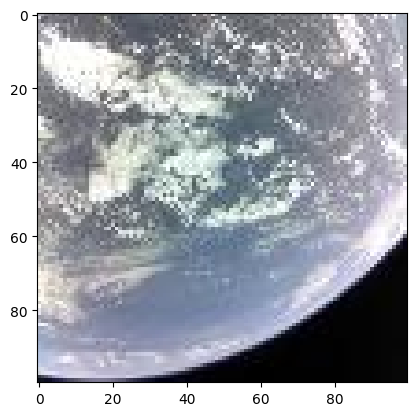

In [2]:
import tensorflow as tf                   # loads tensorflow library, later used to build and train neural networks
import os                                 # Used to interact with the file system (folders and files).

# remove dodgy(corrupt or non images files) images
import cv2                                  # OpenCV library for image processing (Used for reading and processing images)
# import imghdr                               # (deprecated from py 3.13.x) standard library to determine image type, Helps identify invalid or fake image files.
from matplotlib import pyplot as plt        # Used to display images and plots.

# Create the dataset with batching and image size
import numpy as np

os.listdir("../data")                     # Shows all files and folders inside ../data

# # Detects available GPUs. Enables dynamic memory allocation. Prevents TensorFlow from using all GPU memory at once
#gpus = tf.config.experimental.list_physical_devices('GPU')
#print(gpus)                         # shows list of available GPUs
#for gpu in gpus:
#    tf.config.experimental.set_memory_growth(gpu, True)



data_dir = '../data'                        # Stores the path where your image dataset is located.
# os.listdir(os.path.join(data_dir))        # ==>[ bad1 , good1]


# image_exts=['jpeg','jpg','bmp','png']       # List of valid image file extensions.(non need with openCV method. )
# image_exts                                # ==> ['jpeg', 'jpg', 'bmp', 'png'] 


img =  cv2.imread(os.path.join(data_dir, "good1", "0.jpg"))         # Reads the image located at ../data/good1/0.jpg using OpenCV. When OpenCV reads an image, it always returns a NumPy array.
# img.shape                                                         # (100 , 100 , 3)
print(type(img))                             # <class 'numpy.ndarray'>


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    #OpenCV loads images in BGR format. Matplotlib expects RGB. This line converts BGR → RGB before displaying.
plt.show()                                          # Displays the image(RGB).         

GPU Memory usage restriction 

In [3]:
flag=False

if flag:
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        tf.config.set_logical_device_configuration(
            gpus[0],
            [tf.config.LogicalDeviceConfiguration(memory_limit=4096)]  # MB
        )

Data cleaning

In [4]:
# display the image file names
for image_class in os.listdir(data_dir):                                 # Goes through each folder inside data_dir. Each folder represents a class (e.g., bad1, good1)
    for image in os.listdir(os.path.join(data_dir, image_class)):        # Loops through each image file in the class folder
        print(image)                                                     # Prints every file name
      
        
CLEAN_DATASET = False  # change to True only once (to avoid deleting images again and again, manual process)

if CLEAN_DATASET:
    for image_class in os.listdir(data_dir):                                
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)          # Full path to the image file,  ../data/good1/0.jpg
            try:
                img = cv2.imread(image_path)                                 # Tries to read the image using OpenCV, If the image is corrupted, this may fail.
                if img is None:                                              # If OpenCV fails to read the image, img will be None  
                    print(f"Removing corrupted image: {image_path}")    
                    os.remove(image_path)                                    # Deletes the corrupted image file from the filesystem
            except Exception as e:                                           # Catches any other exceptions that may occur during image reading
                print('Removing corrupted image: {}'.format(image_path))     # Logs the removal of the corrupted image
                os.remove(image_path)                                        # Deletes the corrupted image file from the filesystem

16.jpg
17.jpg
19.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
314.jpg
556.jpg
AuroraFromISS2024-642x260.jpg
bz13ZWJw.jpeg
dz0xMjAw.jpeg
MGU3OTM1MjI0Mw.jpeg
QWk2ejU3UjQuZ2lm.jpeg
UEhBPQ.jpeg
0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
18.jpg
2.jpg
3 (3).jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg
cC5qcGc.jpeg
cT04MA.jpeg
PQ.jpeg
REI4Zkh3dw.jpeg


1. Read data from folder

In [5]:
# Reads images from the ../data folder. Creates batches of 8 images, each resized to 100x100 pixels. 
# Automatically assigns labels based on folder names. Now data is a TensorFlow dataset, not a NumPy array yet.
# creates labels based on folder names (bad1 → 0, good1 → 1)
data = tf.keras.utils.image_dataset_from_directory('../data', batch_size=4, image_size=(100,100))

Found 40 files belonging to 2 classes.


1. Visualization

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001E4A0F8F740>)
(4, 100, 100, 3)


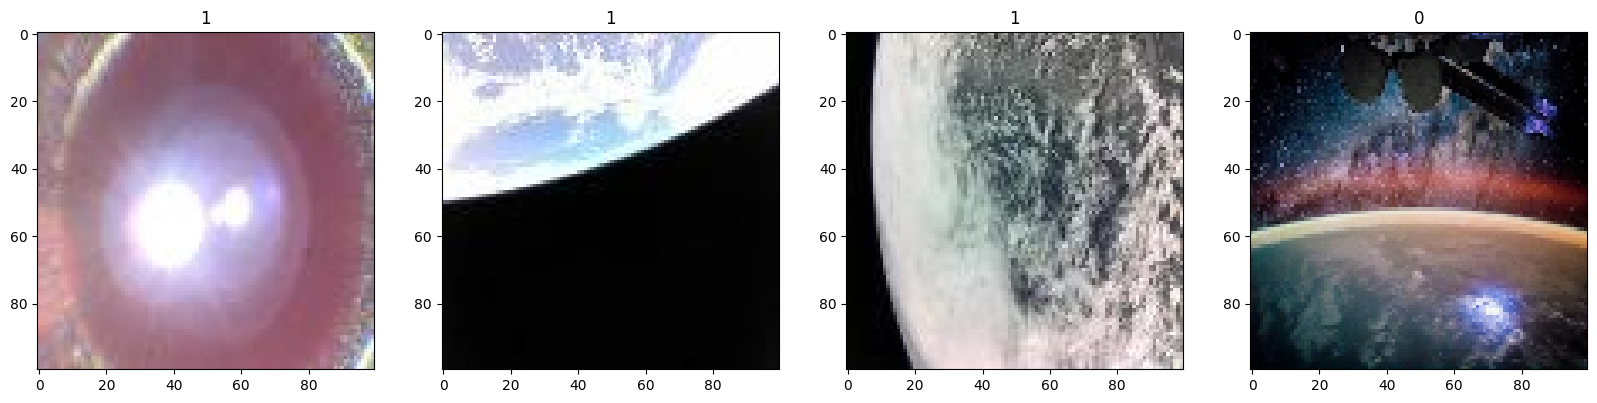

In [6]:
# as_numpy_iterator() converts TensorFlow tensors into NumPy arrays. 
# batch is the first batch of 8 images.
# 1. batch[0] → images (shape: 8, 100, 100, 3)
# 2. batch[1] → labels (0 or 1)
data_iterator = data.as_numpy_iterator()
print(data_iterator)
batch = data_iterator.next()

print(batch[0].shape)  # images shape



# Creates a row of 8 subplots (nrows=1, ncols=8)
# Loops through the 8 images in the batch:
# Converts pixels to int (for visualization)
# Displays each image
# Sets the title as the class label (0 = bad, 1 = good)
fig,ax = plt.subplots(nrows=1 , ncols=4 , figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
        ax[idx].imshow(img.astype(int))
        ax[idx].title.set_text(batch[1][idx])
        
        #class 0 = bad
        #class 1 = good


2. Data scaling (( 0 to 255) -> (0 to 1))

In [7]:
# x - images:(8,100,100,3)   ,   y - labels:(8,)
data = data.map(lambda x,y: (x/255.0, y))    # Normalizes the images by scaling pixel values from [0, 255] to [0, 1]. Keeps labels unchanged.
scaled_iterator = data.as_numpy_iterator()     # Converts the normalized dataset to a NumPy iterator and retrieves the first batch.


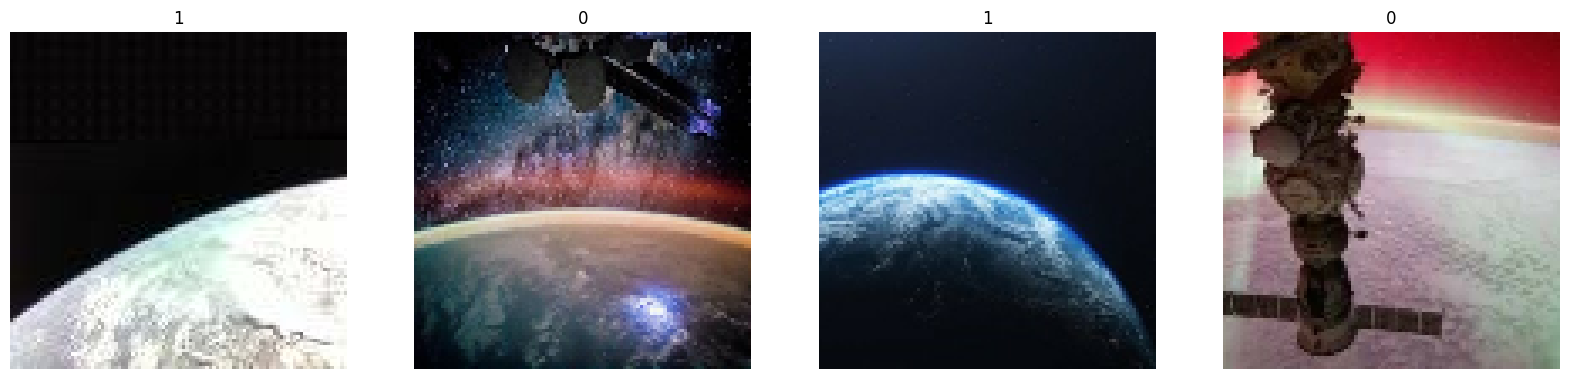

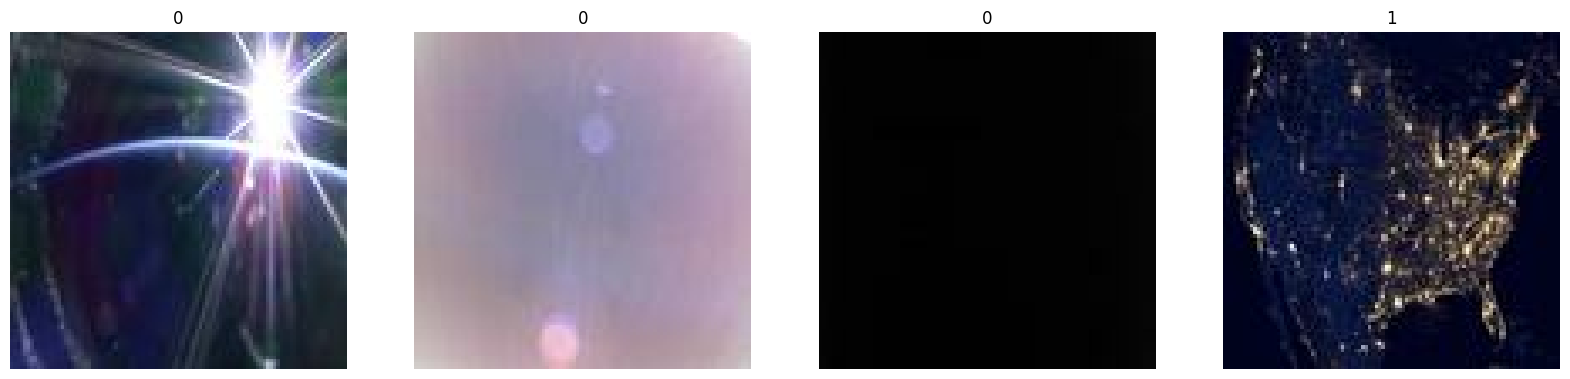

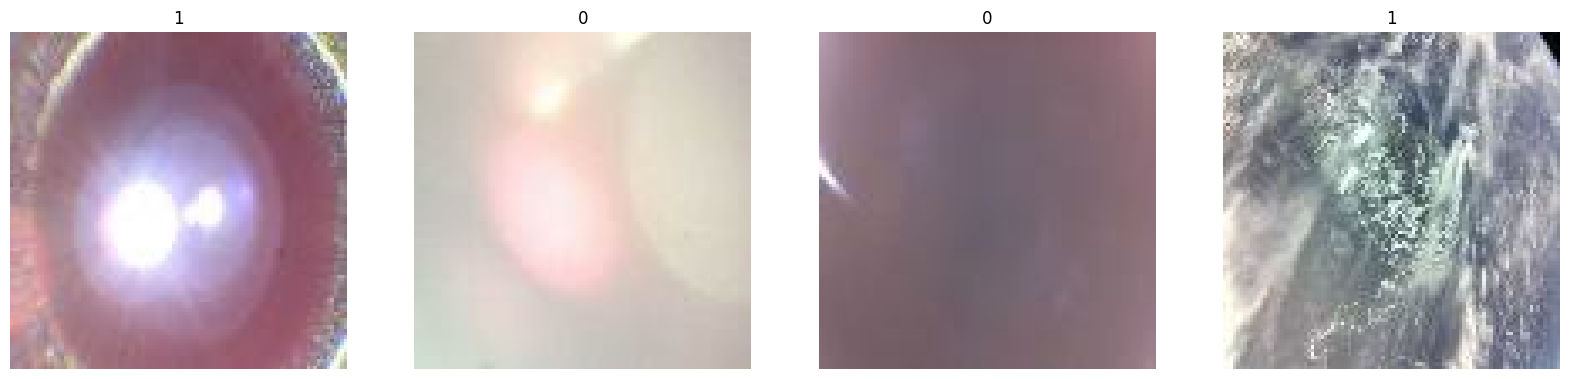

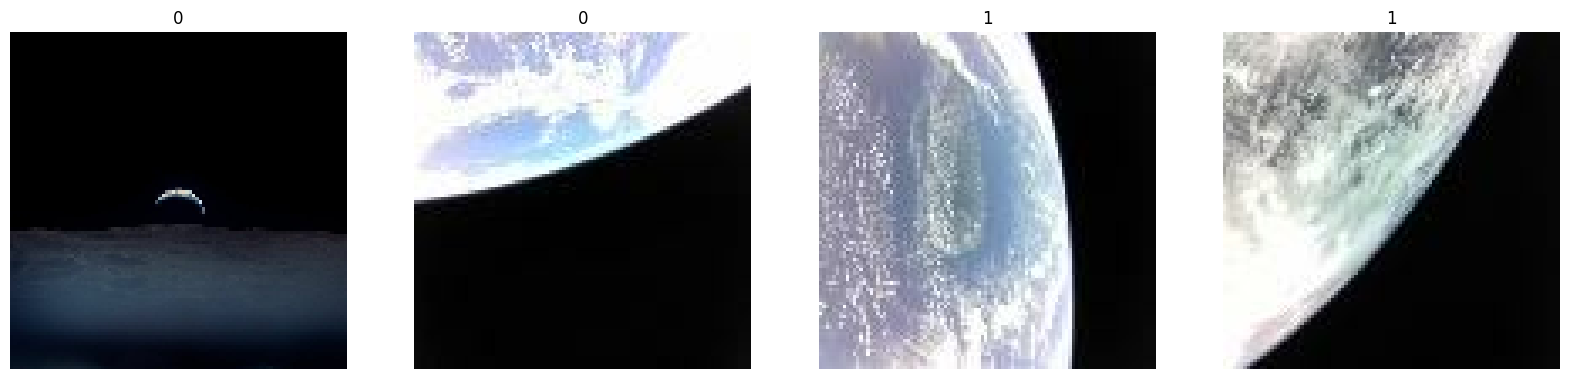

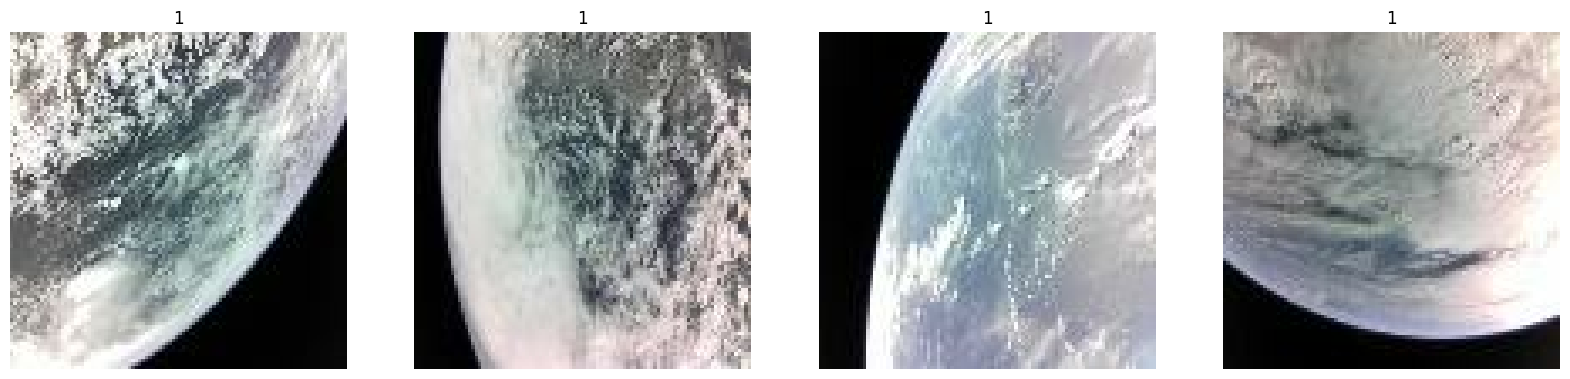

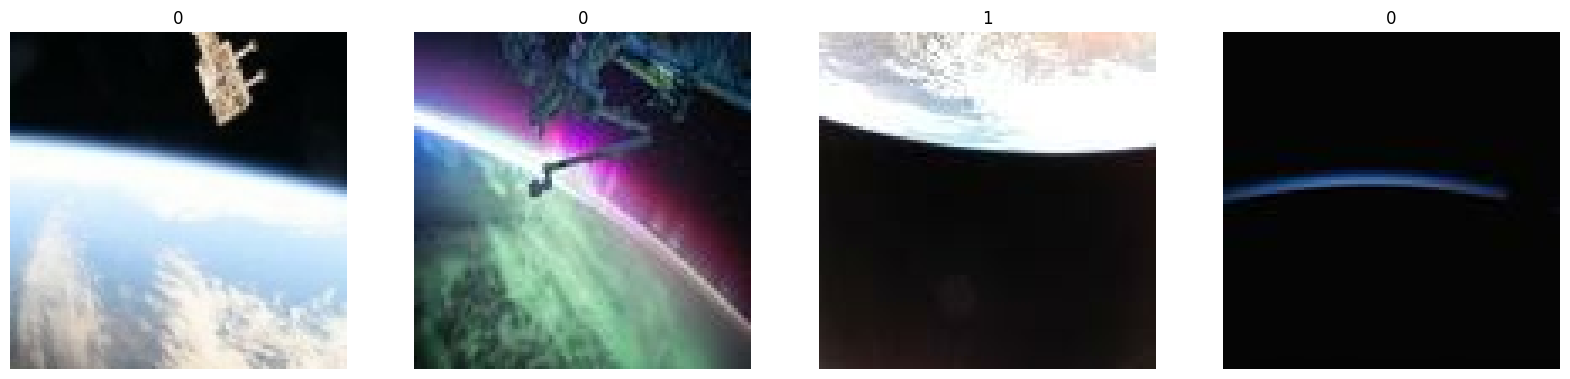

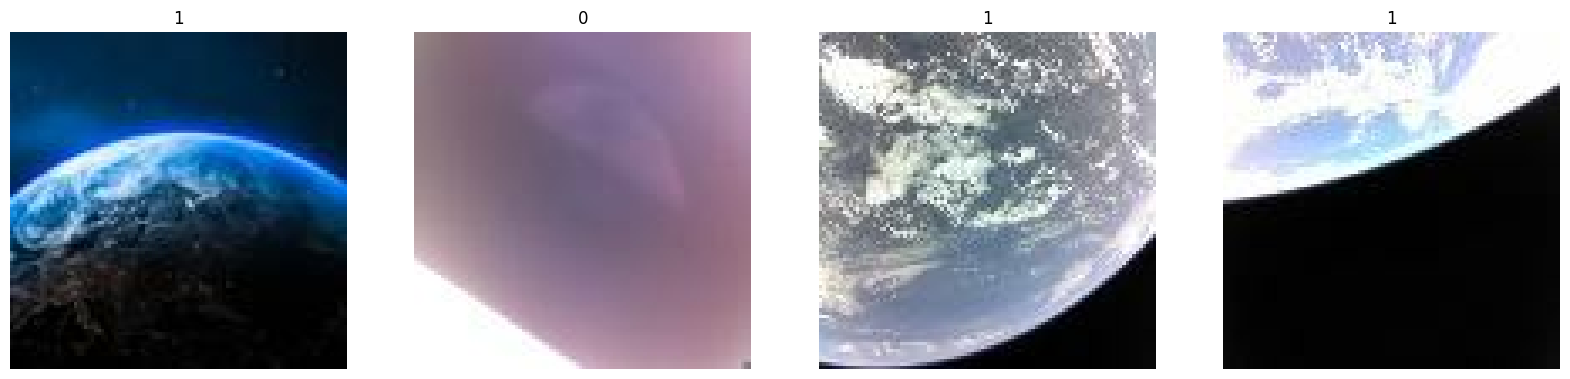

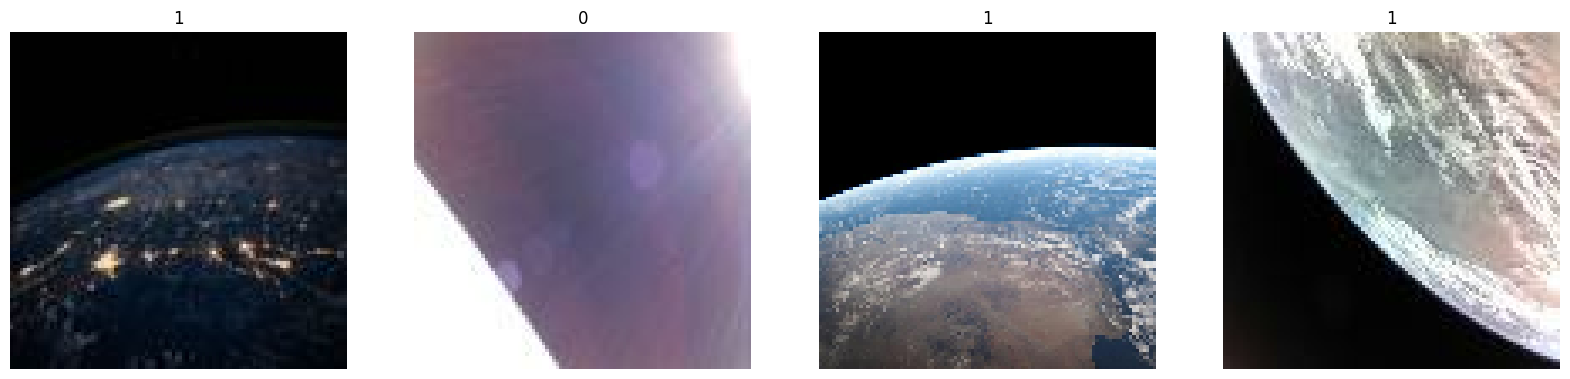

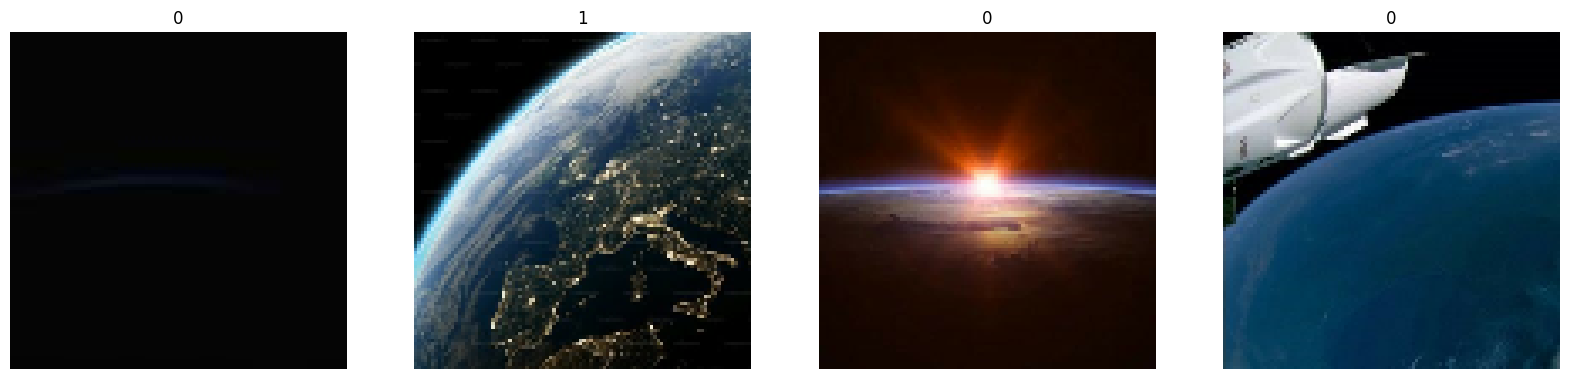

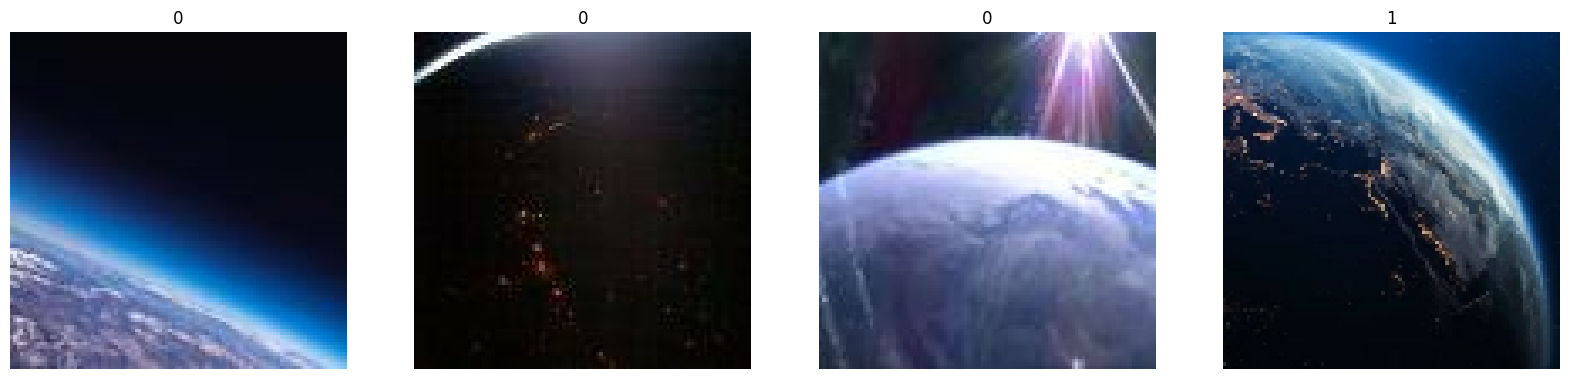

In [8]:
# batch = scaled_iterator.next()               # Gets the next batch of images and labels from the normalized dataset.
# print("max : ", batch[0].max(), "min : ", batch[0].min())                      # Prints the shape of the images in the batch to confirm normalization.
# fig, ax = plt.subplots(1, 4, figsize=(20, 20))

# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img , vmin=0.0, vmax=1.0)
#     ax[idx].set_title(batch[1][idx])
#     # ax[idx].axis("off")


scaled_iterator = data.as_numpy_iterator()

for batch in scaled_iterator:
    # print("max:", batch[0].max(), "min:", batch[0].min())
    fig, ax = plt.subplots(1, 4, figsize=(20, 20))
    for idx, img in enumerate(batch[0][:4]):
        ax[idx].imshow(img, vmin=0.0, vmax=1.0)
        ax[idx].set_title(batch[1][idx])
        ax[idx].axis("off")


2. Splitting

In [9]:
len(data)              #Runs 4 steps per epoch, 29/8 = 3.625 → 4 steps per epoch

10

In [10]:
train_size = int(len(data)*.7)      # 70% of the data for training
val_size = int(len(data)*.2)+1        # 20% of the data for validation 
test_size = int(len(data)*.1)+1      # 10% of the data for testing

print("train:", train_size, "val:", val_size, "test:", test_size)

train: 7 val: 3 test: 2


In [11]:
train = data.take(train_size)        # Takes the first 'train_size' batches for training
val = data.skip(train_size).take(val_size)    # Skips the training batches and takes the next 'val_size' batches for validation
test = data.skip(train_size+val_size).take(test_size)   # Skips the training and validation batches and takes the next 'test_size' batches for testing

# print(data.batch)
len(train)

7

3. Deep Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [13]:
model = Sequential()

In [14]:
#              filter, kernel_size, stride, activation, input_shape
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(100,100,3)))   # 1st convolutional layer with 16 filters of size 3x3, stride 1, ReLU activation
model.add(MaxPool2D())                                                        # 1st max-pooling layer to reduce spatial dimensions

model.add(Conv2D(32, (3,3), 1, activation='relu'))                           # 2nd convolutional layer with 32 filters
model.add(MaxPool2D())                                                        # 2nd max-pooling layer

model.add(Conv2D(64, (3,3), 1, activation='relu'))                           # 3rd convolutional layer with 64 filters
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))                                     # Fully connected layer with 128 neurons
model.add(Dense(1, activation='sigmoid'))                                    # Output layer for binary classification
model.add(Dropout(0.2))                                                     # Dropout layer with 20%



d:\APN\Classification Model\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 843,041 (3.22 MB)

 Trainable params: 843,041 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [17]:
logdir = 'logs'     # Directory to store TensorBoard logs , src/logs

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)   # Sets up TensorBoard callback to log training metrics
hist = model.fit(
    train,
    validation_data=val,
    epochs=15,
    callbacks=[tensorboard_callback]
)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.6071 - loss: 3.7613 - val_accuracy: 0.7500 - val_loss: 0.5038
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5357 - loss: 2.8948 - val_accuracy: 0.5833 - val_loss: 0.7028
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 1.2506 - val_accuracy: 0.5833 - val_loss: 0.6853
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4643 - loss: 1.7928 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3929 - loss: 2.3244 - val_accuracy: 0.5833 - val_loss: 0.6374
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7143 - loss: 1.1311 - val_accuracy: 1.0000 - val_loss: 0.6143
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6071 - loss: 1.6998 - val_accuracy: 1.0000 - val_loss: 0.5140
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 2.8043 - val_accuracy: 0.3333 - val_loss: 0.8571

3.3 Plot Performance

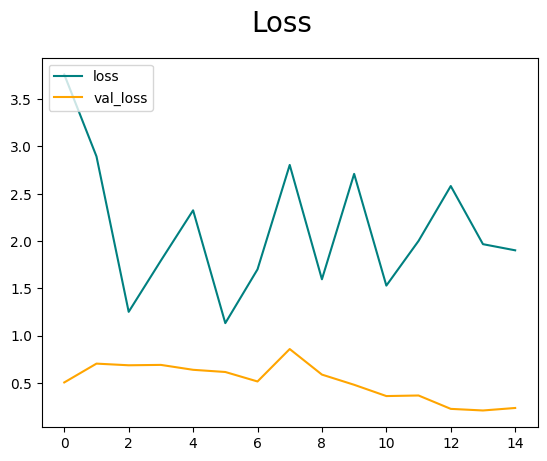

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')            # Plots training loss over epochs
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')  # Plots validation loss over epochs
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

4. Evaluating Performance

4.1 Evaluate

In [20]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy  

In [21]:
pre = Precision()               # Initializes precision metric
re = Recall()                  # Initializes recall metric
acc = BinaryAccuracy()        # Initializes binary accuracy metric

In [22]:
len(test)

0

In [23]:
for batch in test.as_numpy_iterator():    # Loops through each batch in the test dataset
    X, y = batch                        # Splits the batch into images (X) and true labels (y)
    yhat = model.predict(X)             # Uses the trained model to predict labels for the images in the batch
    # yhat = tf.round(yhat)               # Rounds the predicted probabilities to get binary class labels (0 or 1)
    pre.update_state(y, yhat)           # Updates precision metric with true and predicted labels
    re.update_state(y, yhat)            # Updates recall metric with true and predicted labels
    acc.update_state(y, yhat)           # Updates accuracy metric with true and predicted labels

In [24]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

# higher value is better

Precision: 0.0, Recall: 0.0, Accuracy: 0.0


4.2 Test

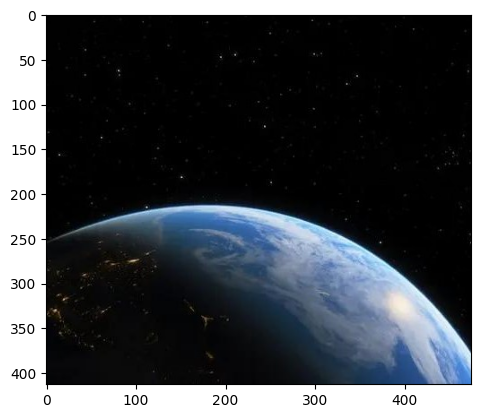

None


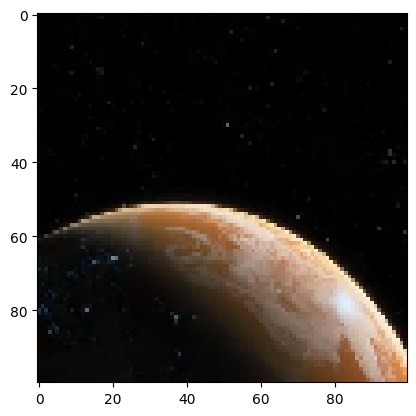

None
(100, 100, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[0.27927616]], dtype=float32)

In [45]:
# img = cv2.imread('../test/earth_from_space.jpg')         # Reads an image from the specified path using OpenCV
# img = cv2.imread('../test/earth3.jpg')        
img = cv2.imread('../test/earth4.jpg')  
# img = cv2.imread('../test/hubbleviewjupiter.jpg')
  
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))                # Converts BGR to RGB and displays the image
print(plt.show())



resize = tf.image.resize(img, (100,100))        
plt.imshow(resize.numpy().astype(int))  
print(plt.show())


print(resize.shape)
np.expand_dims(resize, 0).shape

yhat = model.predict(np.expand_dims(resize/255.0, 0))   # Normalizes the image and adds a batch dimension before prediction
yhat


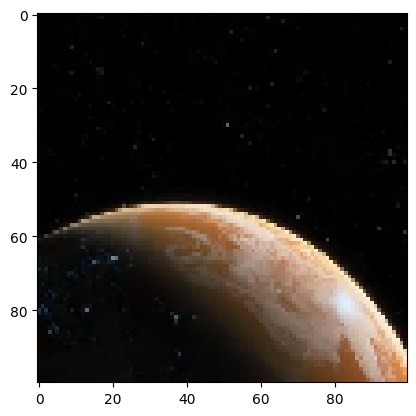

None


In [46]:
resize = tf.image.resize(img, (100,100))        
plt.imshow(resize.numpy().astype(int))  
print(plt.show())

In [47]:
resize.shape

TensorShape([100, 100, 3])

In [48]:
np.expand_dims(resize, 0).shape

(1, 100, 100, 3)

In [49]:
yhat = model.predict(np.expand_dims(resize/255.0, 0))   # Normalizes the image and adds a batch dimension before prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [50]:
yhat

array([[0.27927616]], dtype=float32)

In [51]:
if(yhat > 0.5):
    print("Good Image")
else:
    print("Bad Image")   

Bad Image


5. Save the model

In [ ]:
from tensorflow.keras.models import load_model

model.save(os.path.join('../models', 'image_classification_model.h5'))    # Saves the trained model to the specified path in HDF5 format

In [53]:
new_model = load_model(os.path.join('../models', 'classification_model.h5'))   # Loads the saved model from the specified path
yhatnew = new_model.predict(np.expand_dims(resize/255.0, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


In [54]:
if yhatnew > 0.5:
    print("Good Image")
else:
    print("Bad Image")

Bad Image
